# Table of Content

- [1. Improting libraries](#1.0)

- [2. Reading Datasets](#2.0)

- [3. Dataset Overview & Preparation](#3.0)

  - [3.1 Discription of dataset features](#3.1)
  - [3.2 Information of dataset features](#3.2)
  - [3.3 Renaming Features names](#3.3)
  - [3.4 Statistical Analysis](#3.4)

- [4. Exploratary Data Analysis (EDA)](#4.0)


# [1. Improting libraries](#1.0)


In [221]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    Lasso,
    Ridge,
    ElasticNet,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier, ExtraTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import warnings

# model pipelining
from sklearn.pipeline import Pipeline

# Selection
from sklearn.feature_selection import (
    chi2,
    VarianceThreshold,
    f_classif,
    SelectKBest,
    SelectPercentile,
    SequentialFeatureSelector,
)

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")

# [2. Reading Datasets](#2.0)


In [222]:
bank_df_train = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/dataset/train.csv",
)
bank_df_test = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/Binary Classification with a Bank Churn Dataset/dataset/test.csv"
)

In [223]:
bank_df_train.drop(columns=["id"], axis=1, inplace=True)
bank_df_test.drop(columns=["id"], axis=1, inplace=True)

combine = [bank_df_train, bank_df_test]

- [3. Dataset Overview & Preparation](#3.0)


In [224]:
bank_df_train

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


<div style="padding:0px; font-size:7px; border-radius: 10px;">
    <table style="width: 50%; background-color:#f0f8ff;">
        <tr>
            <th style="text-align:center;font-size:20px;"><b>Variable</b></th>
            <th style="text-align:center;font-size:20px;"><b>Description</b></th>
            <th style="text-align:center;font-size:20px;"><b>Data Type</b></th>
        </tr>
        <tr>
            <td style="text-align:center; color:#0f52ba;font-size:15px;"><strong>Surname</strong></td>
            <td style="text-align:center; color:#0f52ba;font-size:15px;">The customer's surname or last name</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Object</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Credit</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">value representing the customer's credit score</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Geography</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The country where the customer resides</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Object</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Gender</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The customer's gender</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Object</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Age</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The customer's age.</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Tenure</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The number of years the customer has been with the bank</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Balance</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The customer's account balance</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>NumOfProducts</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The number of bank products the customer uses (e.g., savings account, credit card)</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>HasCrCard</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Whether the customer has a credit card:<br>0: no<br>1: yes</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>IsActiveMember</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Whether the customer is an active member:<br>0: not active<br>1: active</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>EstimatedSalary</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">The estimated salary of the customer</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Numeric</td>
        </tr>
        <tr>
            <td style="text-align:center;color:#0f52ba;font-size:15px;"><strong>Exited</strong></td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Whether the customer has churned (Target Variable)</td>
            <td style="text-align:center;color:#0f52ba;font-size:15px;">Binary</td>
        </tr>
    </table>
</div>


- [3.1 Discription of dataset features](#3.1)


In [225]:
bank_df_train.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


- [3.2 Information of dataset features](#3.2)


In [226]:
bank_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerId       165034 non-null  int64  
 1   Surname          165034 non-null  object 
 2   CreditScore      165034 non-null  int64  
 3   Geography        165034 non-null  object 
 4   Gender           165034 non-null  object 
 5   Age              165034 non-null  float64
 6   Tenure           165034 non-null  int64  
 7   Balance          165034 non-null  float64
 8   NumOfProducts    165034 non-null  int64  
 9   HasCrCard        165034 non-null  float64
 10  IsActiveMember   165034 non-null  float64
 11  EstimatedSalary  165034 non-null  float64
 12  Exited           165034 non-null  int64  
dtypes: float64(5), int64(5), object(3)
memory usage: 16.4+ MB


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: there is no null values</b><br>
        <b>Insight: type of features is correct, and there is no objects, that means that all values is numeric</b><br>
    </span>    
</div>


- [3.3 Renaming Features names](#3.3)


In [227]:
mapper = {
    "CustomerId": "id",
    "Surname": "name",
    "Geography": "country",
    "Gender": "gender",
    "Age": "age",
    "CreditScore": "score",
    "Tenure": "number_of_years",
    "Balance": "balance",
    "NumOfProducts": "used_products",
    "HasCrCard": "has_card",
    "IsActiveMember": "activeness",
    "EstimatedSalary": "salary",
    "Exited": "target",
}

for dataset in combine:
    dataset.rename(columns=mapper, inplace=True)

- [3.4 Statistical Analysis](#3.4)


In [228]:
bank_df_train

,id,name,score,country,gender,age,number_of_years,balance,used_products,has_card,activeness,salary,target
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [229]:
print(bank_df_train["target"].value_counts())

print(bank_df_train["has_card"].value_counts())

print(bank_df_train["activeness"].value_counts())

print(bank_df_train["gener"].value_counts())

print(bank_df_train["country"].value_counts())

print(bank_df_train["balance"].value_counts())

target
0    130113
1     34921
Name: count, dtype: int64
has_card
1.0    124428
0.0     40606
Name: count, dtype: int64
activeness
0.0    82885
1.0    82149
Name: count, dtype: int64


KeyError: 'gener'

balance column has 89648 row with value 0, which doesn't make sence


In [ ]:
print(bank_df_train["balance"].value_counts()[0] * 100 / len(bank_df_train))

54.320927808815156


this column will need to be scaled


# [4. Exploratary Data Analysis (EDA)](#4.0)


In [ ]:
cat_columns = []
num_columns = []

for col in bank_df_train.columns:
    if bank_df_train[col].dtype == "O":
        cat_columns.append(col)
    else:
        num_columns.append(col)

num_columns.remove("id")

print(cat_columns)

print(num_columns)

['name', 'country', 'gener']
['score', 'age', 'number_of_years', 'balance', 'used_products', 'has_card', 'activeness', 'salary', 'target']


#### [Skewness](#)


In [ ]:
def skewness(feature):
    skew = bank_df_train[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

### [Outliers]()


In [ ]:
def get_outliers(feature):
    Q1 = bank_df_train[feature].quantile(0.25)
    Q2 = bank_df_train[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = bank_df_train[
        (bank_df_train[feature] < lower_limit) | (bank_df_train[feature] > upper_limit)
    ]
    print("lower_limit = ", lower_limit)
    print("upper_limit = ", upper_limit)
    print("number of outliers = ", len(IQR_df))

    return int(len(IQR_df))

### [Histgram]()


In [ ]:
def hist_gram(num_columns=[]):
    fig, axe = plt.subplots(4, 2, figsize=(10, 12))

    dataset = bank_df_train.copy()

    columns = num_columns
    for feature in num_columns:
        if len(dataset[feature].value_counts()) < 3 or feature == "target":
            columns.remove(feature)

    for i, feature in enumerate(columns):
        row = i // 2
        col = i % 2

        ax = axe[row, col]
        sns.histplot(data=dataset, x=feature, kde=True, multiple="dodge", ax=ax)
        ax.set_title("Distribution of" + str(feature) + "by target")
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")
    axe[3, 1].remove()

    plt.tight_layout()
    plt.show()
    return

In [ ]:
def log_hist_gram(num_columns=[]):

    def skewness_log(feature):
        dataset = bank_df_train.copy()

        skew = dataset[feature].skew()
        print("Skewness of the ", feature, " = ", skew)
        if skew > 0:
            print("The distribution is right-skewed.")
        elif skew < 0:
            print("The distribution is left-skewed.")
        else:
            print("The distribution is approximately symmetric.")
        return

    dataset = bank_df_train.copy()
    fig, axe = plt.subplots(2, 2, figsize=(8, 6))

    for i, feature in enumerate(num_columns):
        row = i // 2
        col = i % 2
        dataset[feature] = np.log(dataset[feature])

        ax = axe[row, col]

        skewness_log(feature)
        print()
        sns.histplot(data=dataset, x=feature, kde=True, multiple="dodge", ax=ax)
        ax.set_title("Distribution of" + str(feature) + "by target")
        ax.set_xlabel(feature)
        ax.set_ylabel("Density")

    plt.tight_layout()
    plt.show()

    return

### [Bar]()


In [ ]:
def bars(num_columns=[]):
    fig, axe = plt.subplots(4, 2, figsize=(10, 12))

    dataset = bank_df_train.copy()

    for i, feature in enumerate(num_columns):
        row = i // 2
        col = i % 2
        if feature == "target":
            continue
        ax = axe[row, col]
        sns.barplot(
            data=dataset,
            x="target",
            y=feature,
            ax=ax,
            estimator="sum",
            width=0.5,
            palette="Dark2",
        )
        ax.set_xlabel(feature)
        ax.set_ylabel("sum")
    axe[3, 1].remove()

    plt.tight_layout()
    plt.show()

    return

### [Pie for target]()


In [ ]:
def pie_chart(feature):

    plt.figure(figsize=(6, 5))
    dataset = bank_df_train.copy()
    category_counts = dataset[feature].value_counts()

    plt.pie(
        category_counts,
        labels=category_counts.index,
        shadow=True,
        wedgeprops={"edgecolor": "black"},
        startangle=0,
        autopct="%3.2f%%",
        radius=1.6,
        textprops={"fontsize": 12},
        colors=sns.color_palette("rocket"),
    )
    plt.pie(
        x=category_counts,
        radius=1.2,
        colors="w",
        wedgeprops={"edgecolor": "white"},
    )
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def box_blot():

    has_outs = []

    for feature in num_columns:
        if feature != "target" and len(bank_df_train[feature].value_counts()) > 5:
            outs = get_outliers(feature)
            if outs > 0:
                has_outs.append(feature)

    fig, axe = plt.subplots(2, 2, figsize=(6, 5))
    dataset = bank_df_train.copy()
    for i, feature in enumerate(has_outs):
        row = i // 2
        col = i % 2
        ax = axe[row, col]
        sns.boxplot(data=dataset, x=feature, color="#45b1e8", ax=ax)

    axe[1, 0].remove()
    axe[1, 1].remove()
    plt.tight_layout()
    plt.show()

In [ ]:
for feature in num_columns:
    if feature != "target":
        skewness(feature)
        print()

Skewness of the  id  =  -0.022939833324234632
The distribution is left-skewed.

Skewness of the  score  =  -0.059291219678312086
The distribution is left-skewed.

Skewness of the  age  =  0.9680627926499467
The distribution is right-skewed.

Skewness of the  number_of_years  =  0.006489806235825698
The distribution is right-skewed.

Skewness of the  balance  =  0.38202044840448784
The distribution is right-skewed.

Skewness of the  used_products  =  0.36827797953532027
The distribution is right-skewed.

Skewness of the  has_card  =  -1.1792552024287104
The distribution is left-skewed.

Skewness of the  activeness  =  0.008919543959011306
The distribution is right-skewed.

Skewness of the  salary  =  -0.309021539731756
The distribution is left-skewed.



In [ ]:
for feature in num_columns:
    if feature != "target" and len(bank_df_train[feature].value_counts()) > 5:
        print(feature)
        get_outliers(feature)
        print()

score
lower_limit =  427.5
upper_limit =  879.5
number of outliers =  253

age
lower_limit =  17.0
upper_limit =  57.0
number of outliers =  6394

number_of_years
lower_limit =  -3.0
upper_limit =  13.0
number of outliers =  0

balance
lower_limit =  -179909.27625
upper_limit =  299848.79375
number of outliers =  0

salary
lower_limit =  -46134.77624999998
upper_limit =  275924.81375
number of outliers =  0



There are outliers in score and age


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


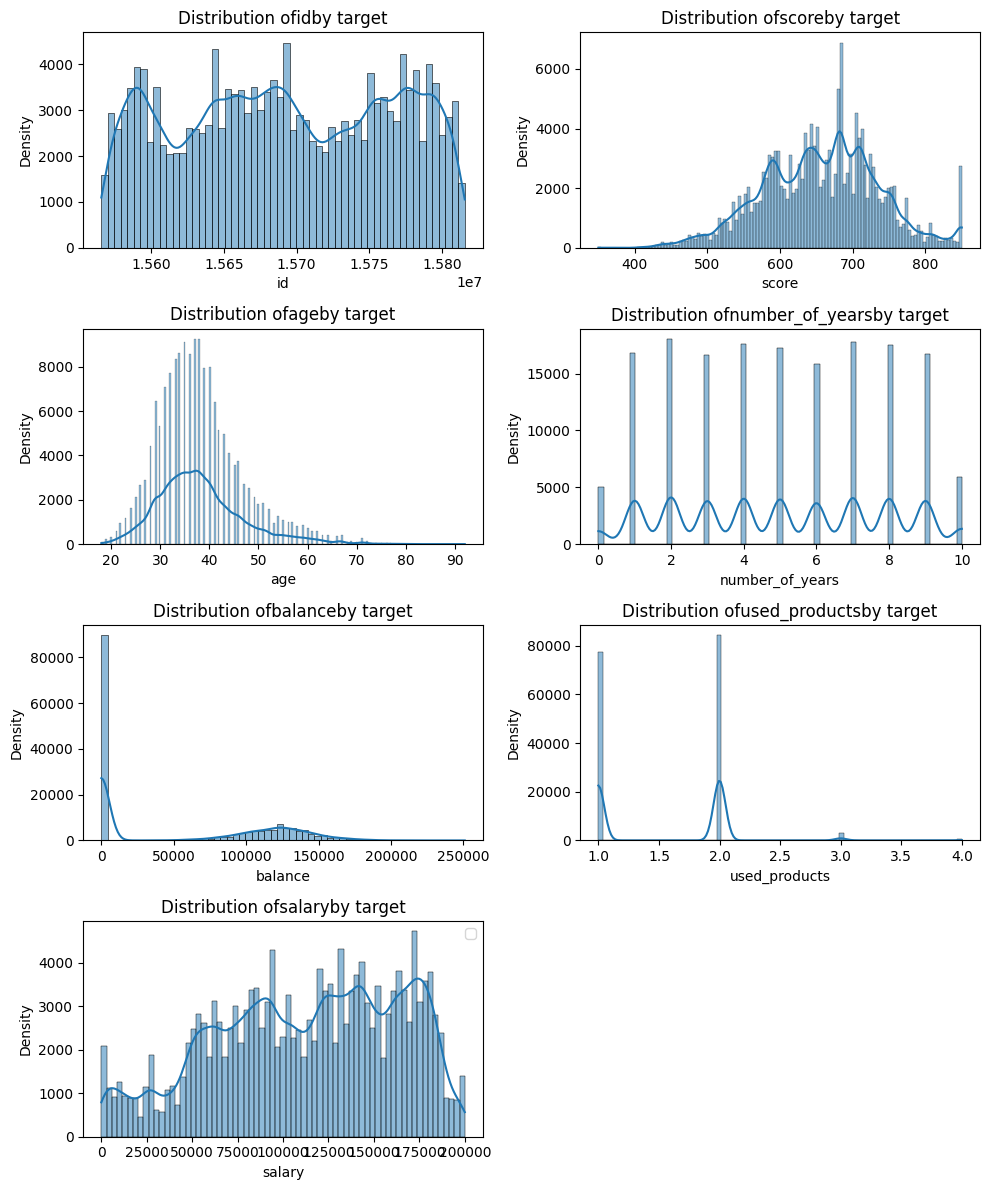

In [ ]:
hist_gram(num_columns=num_columns)

try log for some columns to edit distribution


Skewness of the  salary  =  -0.309021539731756
The distribution is left-skewed.

Skewness of the  age  =  0.9680627926499467
The distribution is right-skewed.

Skewness of the  balance  =  0.38202044840448784
The distribution is right-skewed.

Skewness of the  score  =  -0.059291219678312086
The distribution is left-skewed.



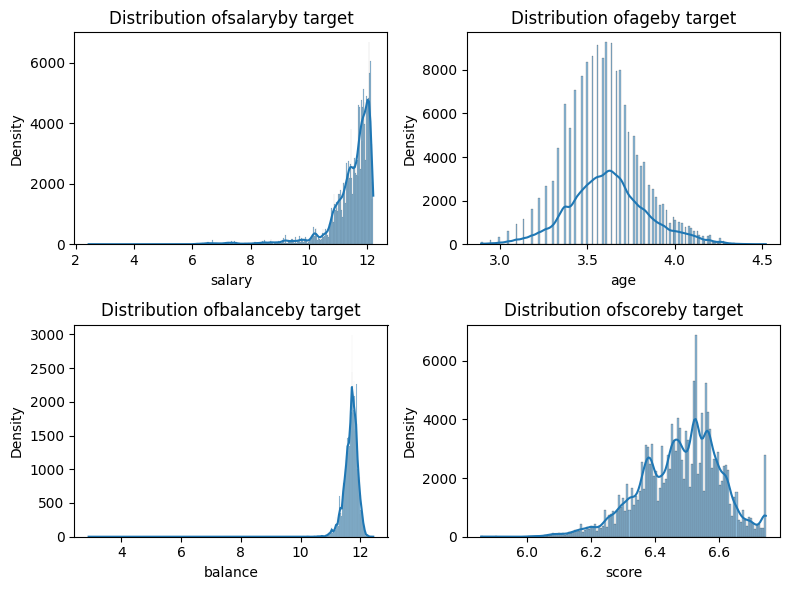

In [ ]:
log_hist_gram(num_columns=["salary", "age", "balance", "score"])

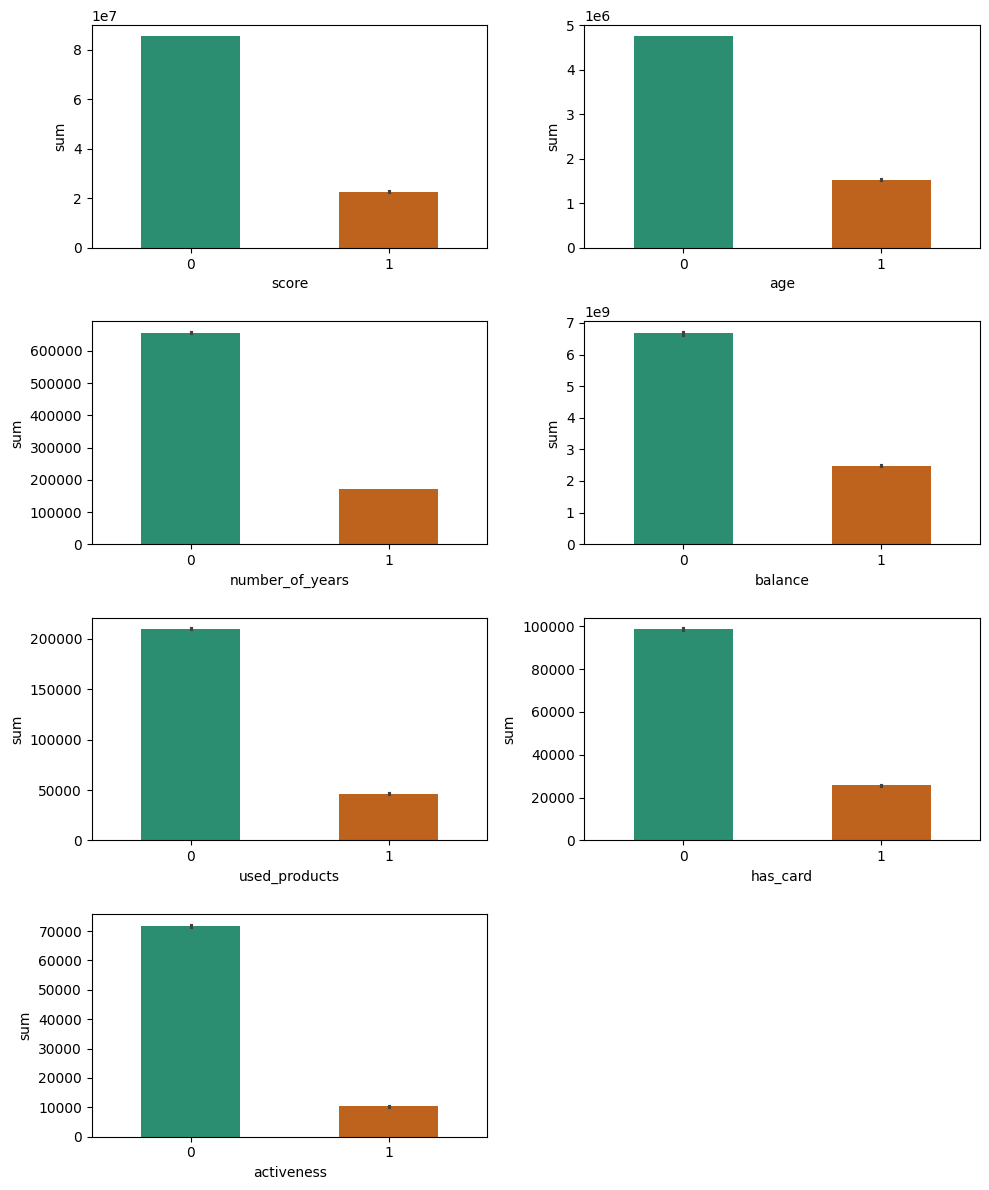

In [ ]:
bars(num_columns)

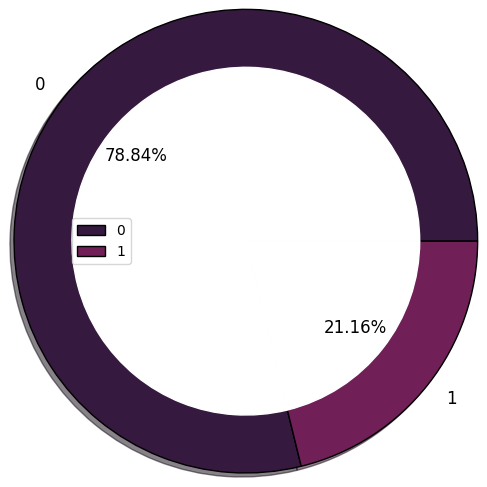

In [ ]:
pie_chart("target")

lower_limit =  427.5
upper_limit =  879.5
number of outliers =  253
lower_limit =  17.0
upper_limit =  57.0
number of outliers =  6394
lower_limit =  -3.0
upper_limit =  13.0
number of outliers =  0
lower_limit =  -179909.27625
upper_limit =  299848.79375
number of outliers =  0
lower_limit =  -46134.77624999998
upper_limit =  275924.81375
number of outliers =  0


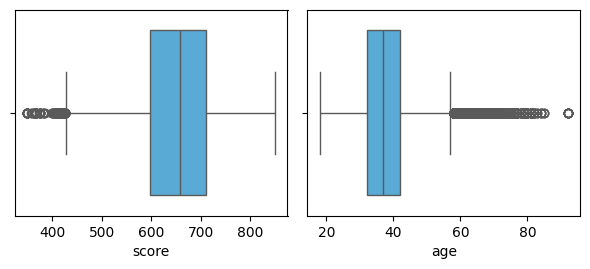

In [ ]:
box_blot()

In [ ]:
cat_columns.remove("name")

<Axes: xlabel='gender', ylabel='count'>

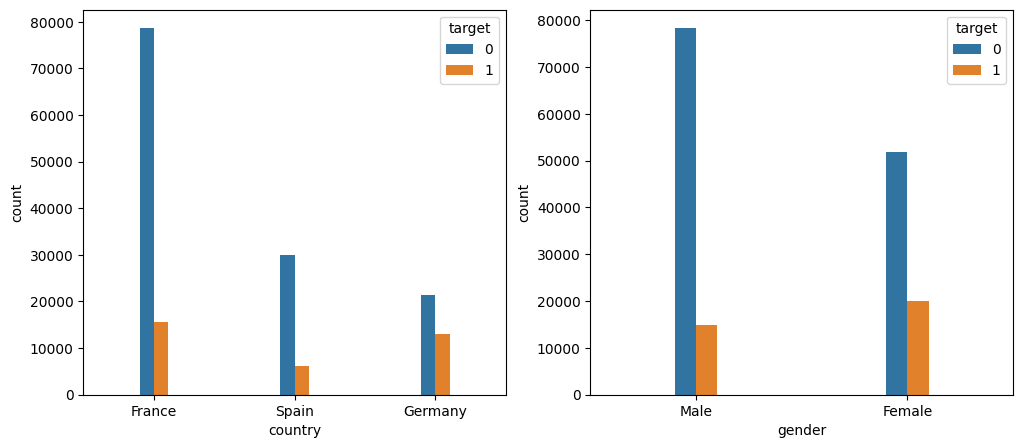

In [231]:
fig, axe = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(
    data=bank_df_train,
    x="country",
    hue="target",
    ax=axe[0],
    width=0.2,
)

sns.countplot(
    data=bank_df_train,
    x="gender",
    hue="target",
    ax=axe[1],
    width=0.2,
)